                                           Data Analysis Summary

This project includes a comprehensive analysis of restaurant data scraped from Deliveroo, focusing on various cuisines and their performance metrics. The analysis covers the following key aspects:

1. Cuisine Performance:

Identified the top 5 and least 5 cuisines based on restaurant ratings.

2. Rating Analysis:

Calculated the mean of the Rating column, rounded to 2 decimal places, providing an overview of customer satisfaction.

3. Distance Analysis:

Analyzed distance metrics to understand delivery ranges and their impact on customer choices.

4. Delivery Cost Analysis:

Evaluated delivery costs to identify pricing trends across different cuisines.

5. Correlation Analysis:

Determined a correlation coefficient between delivery cost and distance, indicating a moderate relationship.
    
6. Average Ratings vs. Delivery Costs:

Compared average ratings and delivery costs by cuisine, revealing a moderate relationship. 
This suggests that while customers value quality, they are also sensitive to pricing. 
These insights can help restaurant owners and delivery services optimize their offerings, ensuring competitive pricing without sacrificing quality.

In [5]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = "C:/Users/janan/OneDrive - Nottingham Trent University/Desktop/Restaurant_delivero.xlsx"  # Replace with your actual file path
restaurant_df = pd.read_excel(file_path)

# Display the first few rows to confirm it's loaded correctly
restaurant_df.head()


,Rank,Name,Distance,Delivery_cost,Unnamed: 4,link,Rating,cuisine
0,384,1212 Hairspression Hair and Body Care Shop,45mi,1.49,1212 Hairspression Hair and Body Care Shop+45m...,http://deliveroo.co.uk/menu/Nottingham/notting...,New,All day breakfast
1,1576,1212 Hairspression Hair and Body Care Shop,45mi,1.49,1212 Hairspression Hair and Body Care Shop+45m...,http://deliveroo.co.uk/menu/Nottingham/notting...,New,Caribbean
2,2010,1212 Hairspression Hair and Body Care Shop,45mi,1.49,1212 Hairspression Hair and Body Care Shop+45m...,http://deliveroo.co.uk/menu/Nottingham/notting...,New,Chinese
3,2391,1212 Hairspression Hair and Body Care Shop,45mi,1.49,1212 Hairspression Hair and Body Care Shop+45m...,http://deliveroo.co.uk/menu/Nottingham/notting...,New,shopping
4,411,2cucina,60mi,4.29,2cucina+60mi+4.29,http://deliveroo.co.uk/menu/Nottingham/univers...,4.6,All day breakfast


In [9]:
# Group by 'restaurant_name' and concatenate 'cuisine' values with a comma separator
restaurant_df_grouped = restaurant_df.groupby('Name')['cuisine'].apply(lambda x: ', '.join(x)).reset_index()

# Merge the grouped data back to the original dataframe
restaurant_df = restaurant_df.drop(columns='cuisine').drop_duplicates(subset='Name')
restaurant_df = pd.merge(restaurant_df, restaurant_df_grouped, on='Name')

# Add a new column that combines restaurant name followed by cuisines
restaurant_df['name_with_cuisines'] = restaurant_df['Name'] + ': ' + restaurant_df['cuisine']

# Display the result
restaurant_df


,Rank,Name,Distance,Delivery_cost,Unnamed: 4,link,Rating,cuisine,name_with_cuisines
0,384,1212 Hairspression Hair and Body Care Shop,45mi,1.49,1212 Hairspression Hair and Body Care Shop+45m...,http://deliveroo.co.uk/menu/Nottingham/notting...,New,"All day breakfast, Caribbean, Chinese, shopping",1212 Hairspression Hair and Body Care Shop: Al...
1,411,2cucina,60mi,4.29,2cucina+60mi+4.29,http://deliveroo.co.uk/menu/Nottingham/univers...,4.6,"All day breakfast, Caribbean, Chinese","2cucina: All day breakfast, Caribbean, Chinese"
2,136,4550 Miles from Delhi,40mi,1.49,4550 Miles from Delhi+40mi+1.49,http://deliveroo.co.uk/menu/Nottingham/notting...,4.4,"All day breakfast, Caribbean, Chinese, indian","4550 Miles from Delhi: All day breakfast, Cari..."
3,218,88th Street Burger Bar,45mi,2.29,88th Street Burger Bar+45mi+2.29,http://deliveroo.co.uk/menu/Nottingham/west-br...,4.6,"All day breakfast, american, Caribbean, Chinese","88th Street Burger Bar: All day breakfast, ame..."
4,206,A&W Caribbean Restaurant & Cafe,55mi,2.79,A&W Caribbean Restaurant & Cafe+55mi+2.79,http://deliveroo.co.uk/menu/Nottingham/sherwoo...,4.6,"All day breakfast, Caribbean, Chinese",A&W Caribbean Restaurant & Cafe: All day break...
...,...,...,...,...,...,...,...,...,...
427,45,YO!,40mi,1.49,YO!+40mi+1.49,http://deliveroo.co.uk/menu/Nottingham/notting...,4.5,"All day breakfast, asian, Caribbean, healthy, ...","YO!: All day breakfast, asian, Caribbean, heal..."
428,422,Yumacha,1.3 mi,1.49,Yumacha+1.3 mi+1.49,http://deliveroo.co.uk/menu/Nottingham/west-br...,4.7,"All day breakfast, asian, Caribbean, Chinese, ...","Yumacha: All day breakfast, asian, Caribbean, ..."
429,367,Yumi Ice Cream Parlour,50mi,2.79,Yumi Ice Cream Parlour+50mi+2.79,http://deliveroo.co.uk/menu/Nottingham/basford...,4.5,"All day breakfast, british, Caribbean, Chinese","Yumi Ice Cream Parlour: All day breakfast, bri..."
430,40,Zaap Thai Street Food,30mi,1.49,Zaap Thai Street Food+30mi+1.49,http://deliveroo.co.uk/menu/Nottingham/notting...,4.7,"All day breakfast, Caribbean, healthy, thai","Zaap Thai Street Food: All day breakfast, Cari..."


In [11]:
restaurant_df.columns

Index(['Rank', 'Name', 'Distance', 'Delivery_cost', 'Unnamed: 4', 'link',
       'Rating', 'cuisine', 'name_with_cuisines'],
      dtype='object')

In [13]:
restaurant_df = restaurant_df.drop(columns=['Unnamed: 4', 'name_with_cuisines'])

In [15]:
restaurant_df

,Rank,Name,Distance,Delivery_cost,link,Rating,cuisine
0,384,1212 Hairspression Hair and Body Care Shop,45mi,1.49,http://deliveroo.co.uk/menu/Nottingham/notting...,New,"All day breakfast, Caribbean, Chinese, shopping"
1,411,2cucina,60mi,4.29,http://deliveroo.co.uk/menu/Nottingham/univers...,4.6,"All day breakfast, Caribbean, Chinese"
2,136,4550 Miles from Delhi,40mi,1.49,http://deliveroo.co.uk/menu/Nottingham/notting...,4.4,"All day breakfast, Caribbean, Chinese, indian"
3,218,88th Street Burger Bar,45mi,2.29,http://deliveroo.co.uk/menu/Nottingham/west-br...,4.6,"All day breakfast, american, Caribbean, Chinese"
4,206,A&W Caribbean Restaurant & Cafe,55mi,2.79,http://deliveroo.co.uk/menu/Nottingham/sherwoo...,4.6,"All day breakfast, Caribbean, Chinese"
...,...,...,...,...,...,...,...
427,45,YO!,40mi,1.49,http://deliveroo.co.uk/menu/Nottingham/notting...,4.5,"All day breakfast, asian, Caribbean, healthy, ..."
428,422,Yumacha,1.3 mi,1.49,http://deliveroo.co.uk/menu/Nottingham/west-br...,4.7,"All day breakfast, asian, Caribbean, Chinese, ..."
429,367,Yumi Ice Cream Parlour,50mi,2.79,http://deliveroo.co.uk/menu/Nottingham/basford...,4.5,"All day breakfast, british, Caribbean, Chinese"
430,40,Zaap Thai Street Food,30mi,1.49,http://deliveroo.co.uk/menu/Nottingham/notting...,4.7,"All day breakfast, Caribbean, healthy, thai"


In [150]:
restaurant_df.describe()

In [23]:
# Extract unique cuisines
cuisine_list = np.array([])

# Append cuisines to the list
for cuisines in restaurant_df['cuisine']:
    if cuisines:
        cuisine_list = np.append(cuisine_list, cuisines.split(', '))

# Get unique cuisines
cuisine_list = pd.Series(np.sort(cuisine_list)).unique()

# Create dummy variables
for cuisine in cuisine_list:
    restaurant_df[cuisine] = restaurant_df['cuisine'].map(lambda x: 1 if x and cuisine in x else 0)

# Display the updated DataFrame
restaurant_df

,Rank,Name,Distance,Delivery_cost,link,Rating,cuisine,All day breakfast,Caribbean,Chinese,...,grocery,healthy,indian,italian,jamaican,japanese,mexican,shopping,thai,turkish
0,384,1212 Hairspression Hair and Body Care Shop,45mi,1.49,http://deliveroo.co.uk/menu/Nottingham/notting...,New,"All day breakfast, Caribbean, Chinese, shopping",1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,411,2cucina,60mi,4.29,http://deliveroo.co.uk/menu/Nottingham/univers...,4.6,"All day breakfast, Caribbean, Chinese",1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,136,4550 Miles from Delhi,40mi,1.49,http://deliveroo.co.uk/menu/Nottingham/notting...,4.4,"All day breakfast, Caribbean, Chinese, indian",1,1,1,...,0,0,1,0,0,0,0,0,0,0
3,218,88th Street Burger Bar,45mi,2.29,http://deliveroo.co.uk/menu/Nottingham/west-br...,4.6,"All day breakfast, american, Caribbean, Chinese",1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,206,A&W Caribbean Restaurant & Cafe,55mi,2.79,http://deliveroo.co.uk/menu/Nottingham/sherwoo...,4.6,"All day breakfast, Caribbean, Chinese",1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,45,YO!,40mi,1.49,http://deliveroo.co.uk/menu/Nottingham/notting...,4.5,"All day breakfast, asian, Caribbean, healthy, ...",1,1,0,...,0,1,0,0,0,1,0,0,0,0
428,422,Yumacha,1.3 mi,1.49,http://deliveroo.co.uk/menu/Nottingham/west-br...,4.7,"All day breakfast, asian, Caribbean, Chinese, ...",1,1,1,...,0,1,0,0,0,0,0,0,0,0
429,367,Yumi Ice Cream Parlour,50mi,2.79,http://deliveroo.co.uk/menu/Nottingham/basford...,4.5,"All day breakfast, british, Caribbean, Chinese",1,1,1,...,0,0,0,0,0,0,0,0,0,0
430,40,Zaap Thai Street Food,30mi,1.49,http://deliveroo.co.uk/menu/Nottingham/notting...,4.7,"All day breakfast, Caribbean, healthy, thai",1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [33]:
restaurant_df.describe()

,Rank,All day breakfast,Caribbean,Chinese,american,asian,british,brunch,cafÃ©,drinks,grocery,healthy,indian,italian,jamaican,japanese,mexican,shopping,thai,turkish
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,219.328704,0.997685,0.958333,0.979167,0.236111,0.118056,0.118056,0.027778,0.034722,0.238426,0.081019,0.111111,0.092593,0.097222,0.002315,0.055556,0.039352,0.057870,0.032407,0.023148
std,130.537825,0.048113,0.200058,0.142992,0.425184,0.323048,0.323048,0.164526,0.183288,0.426615,0.273180,0.314634,0.290197,0.296604,0.048113,0.229327,0.194656,0.233769,0.177285,0.150548
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.750000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,218.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,326.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1004.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\janan\AppData\Local\Temp\ipykernel_29308\2158888533.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cuisine', y='Frequency', data=top_df, palette='viridis')
C:\Users\janan\AppData\Local\Temp\ipykernel_29308\2158888533.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cuisine', y='Frequency', data=least_df, palette='Reds')


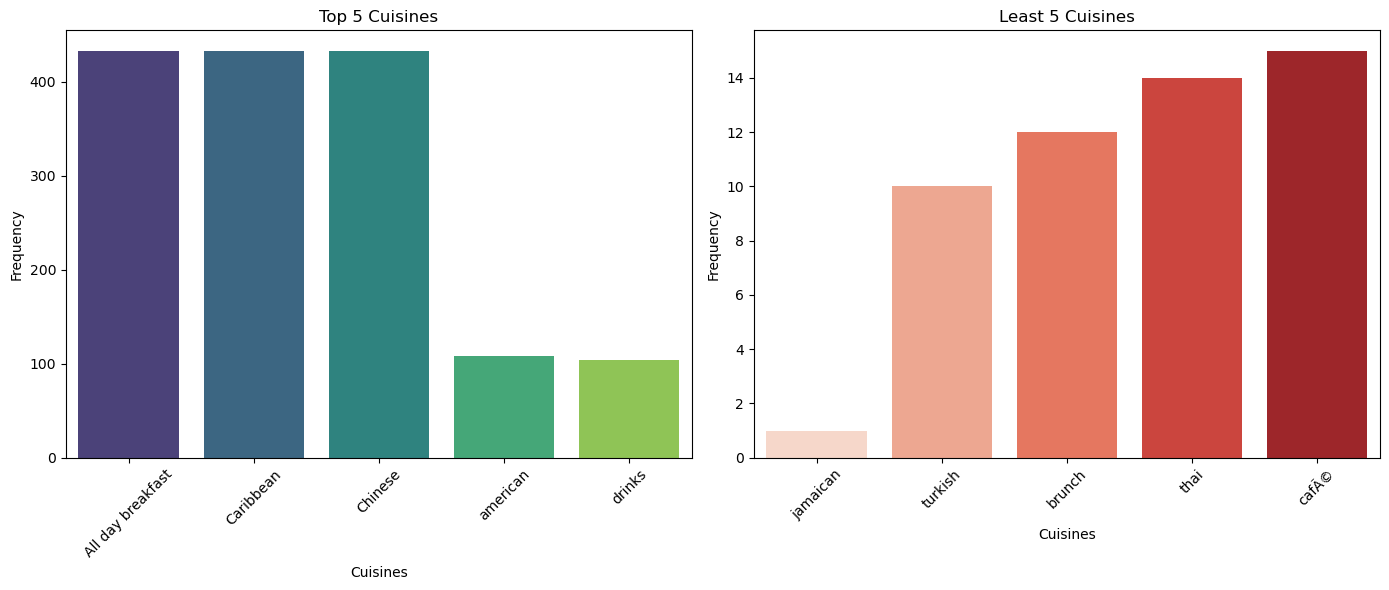

In [49]:
import seaborn as sns
from collections import Counter

# Count cuisines
cuisine_counter = Counter()
for cuisines in restaurant_df['cuisine']:
    if cuisines:
        cuisine_counter.update(cuisines.split(', '))

# Get the top 5 cuisines
top_cuisines = cuisine_counter.most_common(5)
least_cuisines = cuisine_counter.most_common()[:-6:-1] 
cuisines, counts = zip(*top_cuisines)

# Prepare data for plotting
top_df = pd.DataFrame(top_cuisines, columns=['Cuisine', 'Frequency']).assign(Type='Top')
least_df = pd.DataFrame(least_cuisines, columns=['Cuisine', 'Frequency']).assign(Type='Least')

# Combine the DataFrames
combined_df = pd.concat([top_df, least_df])

# Create subplots
plt.figure(figsize=(14, 6))

# Top cuisines plot
plt.subplot(1, 2, 1)
sns.barplot(x='Cuisine', y='Frequency', data=top_df, palette='viridis')
plt.title('Top 5 Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Least cuisines plot
plt.subplot(1, 2, 2)
sns.barplot(x='Cuisine', y='Frequency', data=least_df, palette='Reds')
plt.title('Least 5 Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

Cuisine Popularity:

1. Top Cuisines: The most popular cuisines, each with a frequency of 433, are All Day Breakfast, Caribbean, and Chinese. These cuisines are well-received, indicating strong customer preference.
    
2. Least Popular Cuisines: Conversely, Jamaican (1), Turkish (10), and Brunch (12) represent the least popular options, suggesting limited appeal and potential areas for improvement.

C:\Users\janan\AppData\Local\Temp\ipykernel_29308\2928901821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cuisine', y='Frequency', data=cuisine_df, palette='tab10')


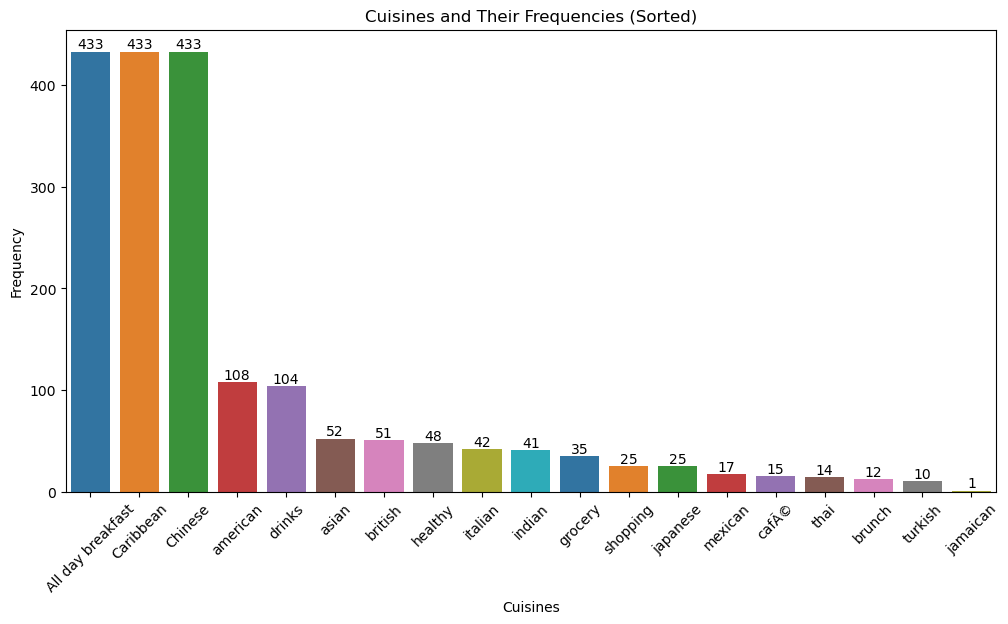

In [75]:
# Convert the Counter to a DataFrame and sort by Frequency
cuisine_df = pd.DataFrame(cuisine_counter.items(), columns=['Cuisine', 'Frequency'])
cuisine_df = cuisine_df.sort_values(by='Frequency', ascending=False)

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Cuisine', y='Frequency', data=cuisine_df, palette='tab10')
plt.xlabel('Cuisines')
plt.ylabel('Frequency')
plt.title('Cuisines and Their Frequencies (Sorted)')
plt.xticks(rotation=45)

# Add numbers on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom')

plt.show()

In [79]:
restaurant_df['Rating'] = pd.to_numeric(restaurant_df['Rating'], errors='coerce')

# Calculate the mean of the Rating column and round to 2 decimal places
mean_rating = round(np.mean(restaurant_df['Rating']), 2)
mean_rating

4.39

Mean Rating:

The overall mean rating across all cuisines is 4.39, reflecting generally high customer satisfaction.

C:\Users\janan\AppData\Local\Temp\ipykernel_29308\1952246343.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_rating_means.index, y=cuisine_rating_means.values, palette='tab10')


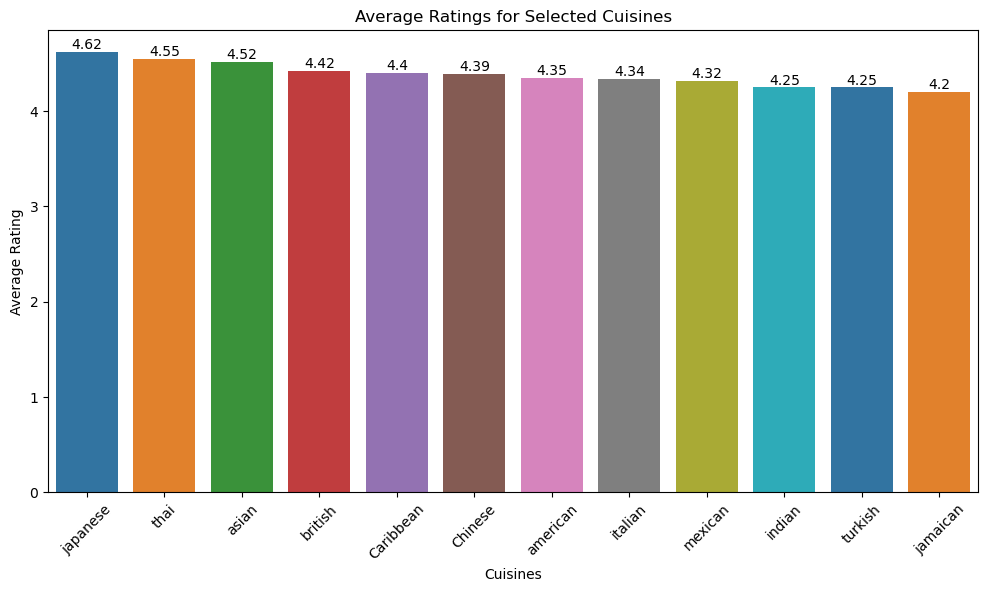

In [103]:
restaurant_df['Rating'] = pd.to_numeric(restaurant_df['Rating'], errors='coerce')

# Selected cuisine columns
selected_cuisines = [
    'japanese', 'thai', 'asian', 'british', 'Caribbean',
    'Chinese', 'american', 'italian', 'mexican', 'indian',
    'turkish', 'jamaican'
]

# Calculate average ratings for selected cuisines
cuisine_rating_means = []
for cuisine in selected_cuisines:
    cuisine_ratings = restaurant_df['Rating'] * restaurant_df[cuisine]
    cuisine_ratings = cuisine_ratings[cuisine_ratings > 0] 
    avg_rating = np.mean(cuisine_ratings) if len(cuisine_ratings) > 0 else 0
    cuisine_rating_means.append(avg_rating)

# Convert to Series for easier plotting
cuisine_rating_means = pd.Series(cuisine_rating_means, index=selected_cuisines)

# Round the average ratings
cuisine_rating_means = round(cuisine_rating_means, 2)

# Sort the Series in descending order
cuisine_rating_means = cuisine_rating_means.sort_values(ascending=False)

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_rating_means.index, y=cuisine_rating_means.values, palette='Set2')
plt.xlabel('Cuisines')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Selected Cuisines')
plt.xticks(rotation=45)
for index, value in enumerate(cuisine_rating_means):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

DISTANCE ANALYSIS

C:\Users\janan\AppData\Local\Temp\ipykernel_29308\1949904437.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_distances.index, y=average_distances.values, palette='Set2')


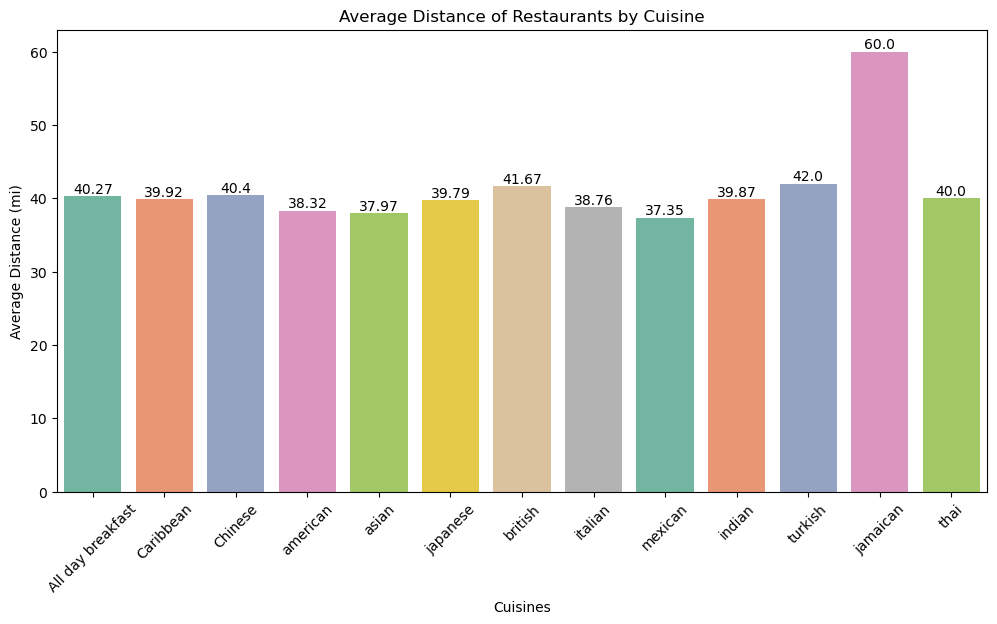

In [113]:
restaurant_df['Distance'] = restaurant_df['Distance'].replace('No distance found', np.nan)
restaurant_df['Distance'] = restaurant_df['Distance'].str.replace('mi', '').astype(float)

# Drop rows with NaN values in the Distance column
restaurant_df = restaurant_df.dropna(subset=['Distance'])
# Step 2: Calculate average distance by cuisine
cuisine_columns = [
    'All day breakfast', 'Caribbean', 'Chinese', 'american', 'asian',
    'japanese', 'british', 'italian', 'mexican', 'indian',
    'turkish', 'jamaican', 'thai'
]

# Initialize a DataFrame to hold average distances
average_distances = {}

for cuisine in cuisine_columns:
    # Calculate average distance for this cuisine
    avg_distance = restaurant_df[restaurant_df[cuisine] == 1]['Distance'].mean()
    average_distances[cuisine] = avg_distance


C:\Users\janan\AppData\Local\Temp\ipykernel_29308\739809270.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_distances.index, y=average_distances.values, palette='tab10')


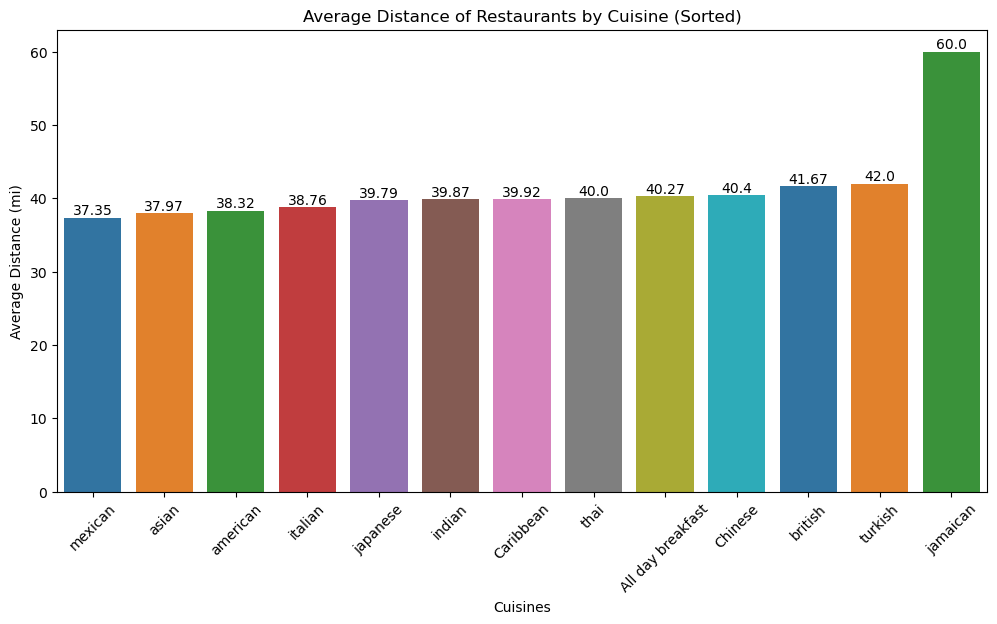

In [117]:
# Convert to Series for easier handling
average_distances = pd.Series(average_distances)
average_distances = pd.Series(average_distances).sort_values(ascending=True)

# Step 3: Plotting the sorted values
plt.figure(figsize=(12, 6))
sns.barplot(x=average_distances.index, y=average_distances.values, palette='tab10')
plt.xlabel('Cuisines')
plt.ylabel('Average Distance (mi)')
plt.title('Average Distance of Restaurants by Cuisine (Sorted)')
plt.xticks(rotation=45)

# Adding the values on top of the bars
for index, value in enumerate(average_distances):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

plt.show()

Delivery cost Analysis

C:\Users\janan\AppData\Local\Temp\ipykernel_29308\1243744943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_df['Delivery_cost'] = pd.to_numeric(restaurant_df['Delivery_cost'], errors='coerce')
C:\Users\janan\AppData\Local\Temp\ipykernel_29308\1243744943.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_delivery_costs.index, y=average_delivery_costs.values, palette='Set1')


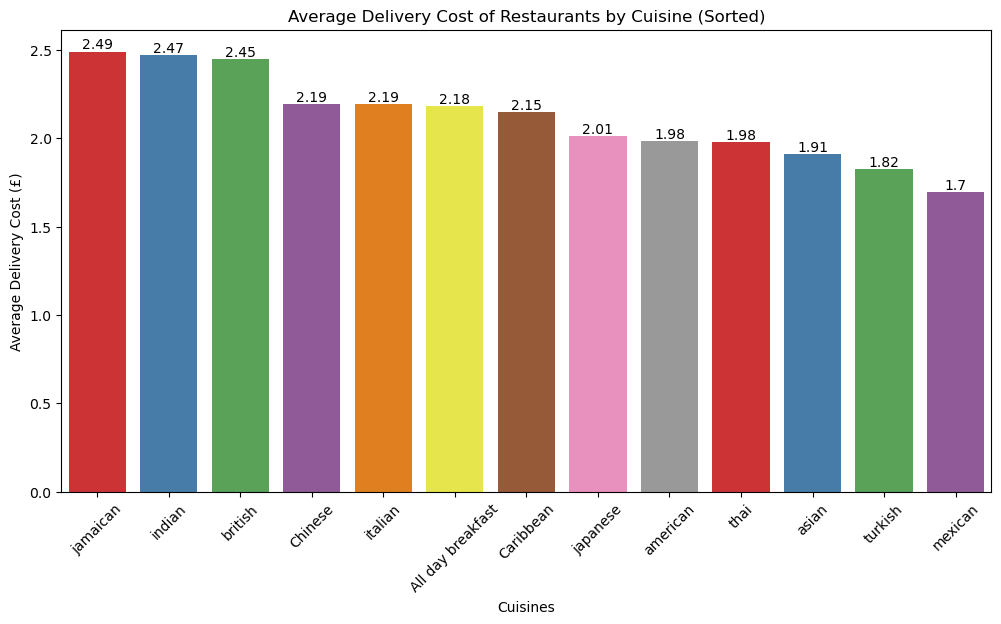

In [123]:
# Step 1: Clean Delivery Cost data
# Convert Delivery_cost to numeric, forcing errors to NaN
restaurant_df['Delivery_cost'] = pd.to_numeric(restaurant_df['Delivery_cost'], errors='coerce')

# Drop rows with NaN values in Delivery_cost
restaurant_df = restaurant_df.dropna(subset=['Delivery_cost'])

# Step 2: Calculate average delivery cost by cuisine
average_delivery_costs = {}

for cuisine in cuisine_columns:
    # Calculate average delivery cost for this cuisine
    avg_cost = restaurant_df[restaurant_df[cuisine] == 1]['Delivery_cost'].mean()
    average_delivery_costs[cuisine] = avg_cost

# Convert to Series for easier handling and sort
average_delivery_costs = pd.Series(average_delivery_costs).sort_values(ascending=False)

# Step 3: Plotting the average delivery costs
plt.figure(figsize=(12, 6))
sns.barplot(x=average_delivery_costs.index, y=average_delivery_costs.values, palette='Set1')
plt.xlabel('Cuisines')
plt.ylabel('Average Delivery Cost (£)')
plt.title('Average Delivery Cost of Restaurants by Cuisine (Sorted)')
plt.xticks(rotation=45)

# Adding the values on top of the bars
for index, value in enumerate(average_delivery_costs):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

plt.show()

Delivery Cost Analysis
The average delivery costs vary among cuisines:
Lowest Delivery Costs: Mexican (£1.70) is the most affordable, but it ranks lower in customer satisfaction (average rating of 4.32).
Competitive Pricing: Cuisines like Asian (£1.91) and Thai (£1.98) provide excellent value with high ratings (4.52 and 4.55, respectively).

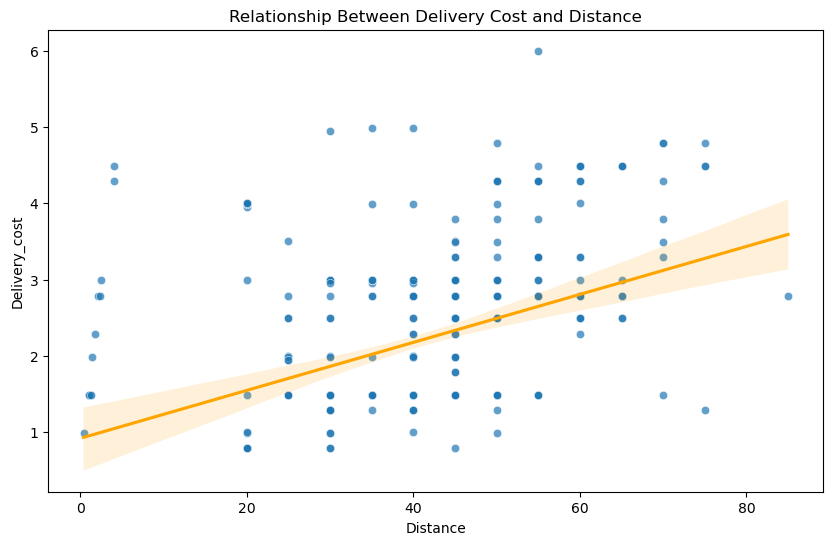

Correlation coefficient between Delivery Cost and Distance: 0.41


In [127]:
# Step 1: Clean Distance data
# Ensure Distance is treated as string for replacement
restaurant_df['Distance'] = restaurant_df['Distance'].astype(str)

# Replace 'No distance found' with NaN and convert to float
restaurant_df['Distance'] = restaurant_df['Distance'].replace('No distance found', np.nan)
restaurant_df['Distance'] = restaurant_df['Distance'].str.replace('mi', '').astype(float)

# Drop rows with NaN values in Distance or Delivery_cost
restaurant_df = restaurant_df.dropna(subset=['Distance', 'Delivery_cost'])

# Step 2: Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Delivery_cost', data=restaurant_df, alpha=0.7)
plt.title('Relationship Between Delivery Cost and Distance')
plt.xlabel('Distance (mi)')
plt.ylabel('Delivery Cost (£)')

# Optional: Add a regression line
sns.regplot(x='Distance', y='Delivery_cost', data=restaurant_df, scatter=False, color='orange')

plt.show()

# Step 3: Calculate the correlation coefficient
correlation = restaurant_df['Distance'].corr(restaurant_df['Delivery_cost'])
print(f'Correlation coefficient between Delivery Cost and Distance: {correlation:.2f}')


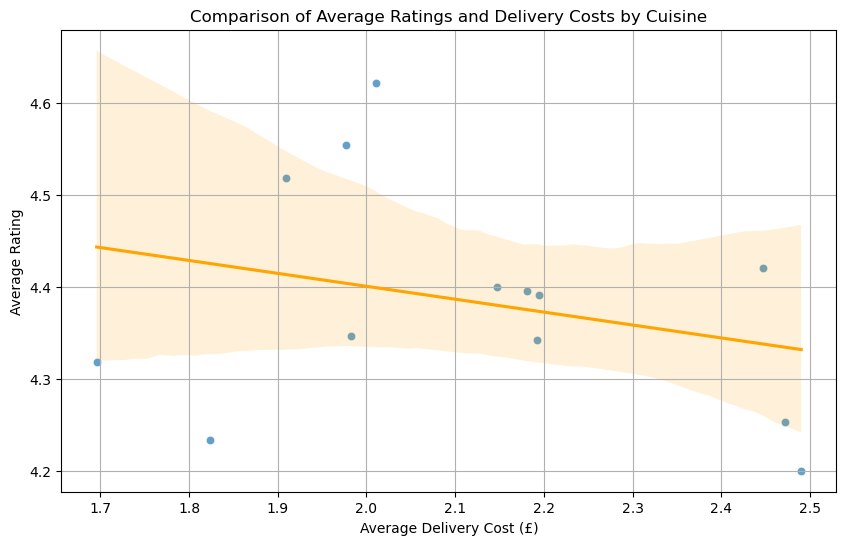

In [129]:
# Step 1: Calculate average ratings and delivery costs by cuisine
average_ratings = {}
average_delivery_costs = {}

for cuisine in cuisine_columns:
    avg_rating = restaurant_df[restaurant_df[cuisine] == 1]['Rating'].mean()
    avg_cost = restaurant_df[restaurant_df[cuisine] == 1]['Delivery_cost'].mean()
    
    average_ratings[cuisine] = avg_rating
    average_delivery_costs[cuisine] = avg_cost

# Step 2: Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Average Rating': average_ratings,
    'Average Delivery Cost (£)': average_delivery_costs
})

# Drop cuisines with NaN values
comparison_df = comparison_df.dropna()

# Step 3: Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_df, x='Average Delivery Cost (£)', y='Average Rating', alpha=0.7)

# Optional: Add a regression line
sns.regplot(data=comparison_df, x='Average Delivery Cost (£)', y='Average Rating', scatter=False, color='orange')

plt.title('Comparison of Average Ratings and Delivery Costs by Cuisine')
plt.xlabel('Average Delivery Cost (£)')
plt.ylabel('Average Rating')
plt.grid()
plt.show()


In [131]:
print(comparison_df)

                   Average Rating  Average Delivery Cost (£)
All day breakfast        4.395349                   2.180974
Caribbean                4.399458                   2.147568
Chinese                  4.391534                   2.194126
american                 4.346875                   1.982100
asian                    4.518367                   1.909216
japanese                 4.621739                   2.010833
british                  4.420408                   2.447059
italian                  4.342500                   2.192195
mexican                  4.318750                   1.695882
indian                   4.252778                   2.471579
turkish                  4.233333                   1.823333
jamaican                 4.200000                   2.490000
thai                     4.554545                   1.976429


                                              Summary of Inferences from Average Ratings and Delivery Costs

1. Japanese cuisine stands out with the highest average rating (4.62), suggesting a strong customer preference and satisfaction. Its delivery cost (£2.01) is also competitive.
Cost-Effectiveness:

2. Asian and Thai cuisines also demonstrate high ratings (4.52 and 4.55, respectively) with low delivery costs (around £1.90), indicating they provide good value for money.
Lowest Delivery Costs:

3. Mexican cuisine has the lowest average delivery cost (£1.70) but does not rank as highly in customer satisfaction (average rating of 4.32). This may suggest that while it’s affordable, it may not meet customer expectations as effectively as other cuisines.
Price Sensitivity:

4. Higher delivery costs (e.g., Indian at £2.47) do not always correlate with higher ratings, as seen with its average rating of 4.25. This indicates that customers may not perceive higher prices as indicative of better quality in every case.
Market Positioning:

5. British cuisine, with an average rating of 4.42 and a higher delivery cost (£2.45), may attract customers looking for traditional dining experiences, balancing quality with cost.
   
Conclusion:

Overall, there is a moderate relationship between average ratings and delivery costs, suggesting that while customers appreciate quality, they are also sensitive to pricing. This insight can help restaurant owners and delivery services tailor their offerings, ensuring competitive pricing without compromising on quality.

Rating Distribution:

Create histograms or density plots to visualize the distribution of ratings across all restaurants. This can help identify patterns in customer satisfaction

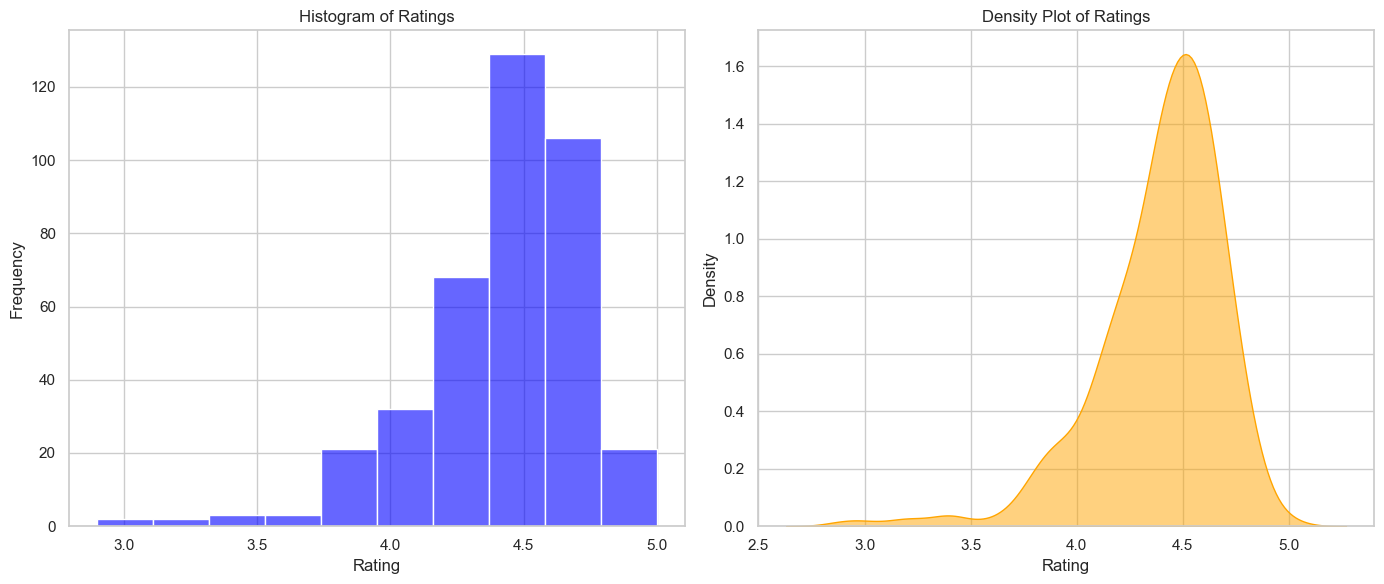

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(restaurant_df['Rating'], bins=10, kde=False, color='blue', alpha=0.6)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(restaurant_df['Rating'], color='orange', fill=True, alpha=0.5)
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')

plt.tight_layout()
plt.show()
